# Lab 3: Pandas

(Last update: 07/12/2023)

Full name: Nguyen Huy Thanh  
Student ID: 21127430

---

**Tóm tắt**: In this assignment, you are going to learn how to use `Pandas`. Loops, and methods such as `apply/applymap` are not allowed to use unless specifically instructed to do so.

## 0. General instructions

### 0.0. Work on assignment

- You will do your assignment directly on this notebook file. First, you fill your name and student code at the beginning of the file. In this file, you will write your code when you see the following lines of code:
    ```python
    # TODO
    raise NotImplementedError()
    ```

    For optional coding parts, there will be:

    ```python
    # TODO (OPTIONAL)
    ```

    For markdown cell, there will be:

    ```markdown
    **TODO**: ...
    ```

- Of course, you have to remove the `raise NotImplementedError()` statement when you finish.

- For coding parts, there are often cells below to help you check your answers. You will pass the test if there are no errors when you run the test cells. In some cases, the tests are insufficient. That means if you do not pass the test, your answer is definitely wrong somewhere, but if you pass the test, your answer may still be incorrect.

- While doing the assignment, you should print out the output and create more cells for testing. But you have to remove all of them (comment your print-out codes, delete the cell created by you) when you submit your code. <font color=red>Do not remove or edit my cells</font> (except for the aforementioned cells).

- Keep your code clean and clear by using meaningful variable names and comments, not write too-long coding lines. Press `Ctrl + S` right after editing.

- **Keep it real**: The reason why you are here is to <font color=green>study, really study</font>. I highly recommend that you discuss your idea with your friends and <font color=green>write your own code based on your own knowledge</font>. <font color=red>Copy means zero.</font>

### 0.1. Submit your assignment

- When grading your assignment, I will choose `Kernel` - `Restart & Run All` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename the notebook as `<Student ID>.ipynb`. For example, if your student code is 1234567, then your notebook is `1234567.ipynb`.

- Finally, submit your notebook file on Moodle. <font color=red>Please strictly follow the submission rules.</font>

---

## 1. Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
warnings.simplefilter('ignore')

# TODO (OPTION): import your libraries

## 2. Data collection

- I have done that for you. In this assignment, you are going to analyze a dataset collected from **A survey on facial cleanser consumption behavior of 18-25 year olds in HCM City**. You are provided the following files:
    - `./survey.csv`: Survey results of more than 300 people taking part in the survey on GoogleForm. You will mainly work on this file.
    - `./survey.xlsx`: The content is similar to `./survey.csv` but you can open it in Excel to have a better view.
    - `./form.pdf`: Questionnaire survey.

- Read `./form.pdf` and summarize the survey by indicating **sections** in the form as well as **possible scenarios** when conducting the survey.

    **TODO**: In my opinion, in this form, there are 2 type of question. The 1st is single answer and the 2nd is multiple answer which people can choose more than 1 option. Furthermore, in multiple answer questions have a section called `Khác` that allow people to answer what ever they want. And a scenario can occur that ones have never used facial cleanser before so that this will not help us much in this survey. Additionally, there are 2 sections called `Bạn bao nhiêu tuổi?` and `Hiện tại bạn đang cư trú ở đâu?` which are also very importannt. Because this survey is about teenager whose ages is from 18-25 and living in HCM city.

- Data source: Võ Thị Minh Trà, University of Economics Ho Chi Minh City.

## 3. Data pre-processing and exploration

- In this section, you are going to explore features of data. First, you have to read the data from `./survey.csv` and store it into a dataframe called `survey_df`.

In [2]:
# TODO: read data from ./survey.csv and save to survey_df then display 5 first lines of data
survey_df = pd.read_csv('./data/survey.csv')
survey_df.head(5)

,Dấu thời gian,Bạn bao nhiêu tuổi?,Hiện tại bạn đang cư trú ở đâu?,Bạn đã sử dụng sữa rửa mặt bao giờ chưa?,Nguyên nhân bạn chưa sử dụng sữa rửa mặt là gì?,Giới tính của bạn là?,1. Bạn sử dụng sữa rửa mặt với mục đích gì?,2. Da của bạn thuộc loại da gì?,3. Bạn thường sử dụng sữa rửa mặt bao nhiêu lần một ngày?,4. Bạn sử dụng sữa rửa mặt khi nào?,...,20. Bạn lo ngại điều gì khi sử dụng sữa rửa mặt?,"21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nb, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Chất lượng]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Thương hiệu]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Giá cả]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Mẫu mã]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Xuất xứ]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Thành phần]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Mùi hương]","22. Nếu chúng tôi ra mắt một sản phẩm sữa rửa mặt mới, bạn có sẵn sàng dùng thử hay không?",23. Bạn mong muốn điều gì nhất ở một sản phẩm sữa rửa mặt mới?
0,04/02/2023 20:10:08,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da hỗn hợp,Ít hơn 1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",7.0,5.0,7.0,5.0,5.0,3.0,6.0,Có,Sản phẩm được tích hợp nhiều công dụng
1,04/02/2023 20:11:52,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Hỗ trợ làm trắng da, Loại bỏ bụi bẩn; dầu thừa...",Da dầu,1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Tác dụng phụ; gây kích ứn...",7.0,6.0,2.0,2.0,2.0,7.0,4.0,Có,Sản phẩm chuyên sâu với hiệu quả cao
2,04/02/2023 20:12:49,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ...",4.0,4.0,4.0,4.0,4.0,4.0,4.0,Chưa biết,Sản phẩm chuyên sâu với hiệu quả cao
3,04/02/2023 20:20:42,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,Có,Sản phẩm lành tính với nhiều loại da
4,04/02/2023 20:23:34,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",6.0,5.0,6.0,5.0,6.0,7.0,5.0,Chưa biết,Sản phẩm lành tính với nhiều loại da


### 3.0. How many rows/columns are there in the dataset?

- Save the number of rows and columns to `n_rows, n_cols`

In [3]:
# TODO: save your answer to n_rows, n_cols
n_rows, n_cols = survey_df.shape
n_rows, n_cols

(337, 38)

In [4]:
# TEST
assert (n_rows, n_cols) == (337, 38)

### 3.1. Explore rows

- Each row is a result, which is done by the person taking part in the survey. These people conducted the survey on GoogleForm. The results are then saved to a sheet and converted to `*.csv` and `*.xlsx`

- Is there any duplicate row? You will check it using `Pandas`.

In [5]:
# TODO: save your answer to is_duplicate
dup = np.sum(survey_df.duplicated())
if dup == 0:
    is_duplicate = False
else:
    is_duplicate = True

In [6]:
# TEST
assert is_duplicate == False

### 3.2. Explore columns

- Observe the data provided, carefully read the column titles as well as the data contained in the columns, and compare them with the survey questionnaire to gain knowledge about the data.
- Since the column titles are too long, we have to re-name them in order to work on them easily.

In [7]:
# TODO: rename the columns. new names = ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]
new_names = ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]
survey_df.rename(columns=dict(zip(survey_df.columns, new_names)), inplace=True)

In [8]:
# TEST
assert (survey_df.columns == ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]).all()

### 3.3. Remove meaningless rows and columns

- Once again, this is **A survey on facial cleanser consumption behavior of 18-25 year olds in HCM City**. That means those people who do not live in HCM City or those whose age is not in the range of [18-25] will be removed.
- After removing these people, column `Tuổi` and `Địa_chỉ` become meaningless since they contain the same data. Therefore, we also remove these columns.

In [9]:
# TODO: remove those whose age is not within the range [18-25] and whose address is not HCM City
# TODO: then, remove 2 corresponding columns
survey_df = survey_df.loc[(survey_df['Tuổi'] == 'Từ 18 - 25 tuổi') & (survey_df['Địa_chỉ'] == 'TP.HCM'), :]
survey_df.drop(columns=['Tuổi', 'Địa_chỉ'], inplace=True)
survey_df.head()

,Thời_gian,Đã_dùng_srm?,Lý_do_chưa_sd,Giới_tính,1_Mục_đích_sd_srm,2_Loại_da,3_Tuần_suất_1ngày,4_Sd_khi_nào,5_Mua_ở_đâu,6_Quảng_cáo_ở_đâu,...,20_Lo_ngại_về_srm,21_Mức_ảnh_hưởng_của_chất_lượng,21_Mức_ảnh_hưởng_của_thương_hiệu,21_Mức_ảnh_hưởng_của_giá_cả,21_Mức_ảnh_hưởng_của_mẫu_mã,21_Mức_ảnh_hưởng_của_xuất_xứ,21_Mức_ảnh_hưởng_của_thành_phần,21_Mức_ảnh_hưởng_của_mùi_hương,22_Dùng_thử?,23_Kỳ_vọng
0,04/02/2023 20:10:08,Đã từng,NaN,Nam,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da hỗn hợp,Ít hơn 1 lần/ngày,Trước khi đi ngủ,"Các sàn thương mại điện tử, Nhà thuốc","Truyền thông; quảng cáo, Tự tìm hiểu, Bạn bè",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",7.0,5.0,7.0,5.0,5.0,3.0,6.0,Có,Sản phẩm được tích hợp nhiều công dụng
1,04/02/2023 20:11:52,Đã từng,NaN,Nữ,"Hỗ trợ làm trắng da, Loại bỏ bụi bẩn; dầu thừa...",Da dầu,1 lần/ngày,Trước khi đi ngủ,"Các sàn thương mại điện tử, Cửa hàng của hãng,...","Truyền thông; quảng cáo, Tự tìm hiểu, Bạn bè",...,"Hàng giả; hàng nhái, Tác dụng phụ; gây kích ứn...",7.0,6.0,2.0,2.0,2.0,7.0,4.0,Có,Sản phẩm chuyên sâu với hiệu quả cao
2,04/02/2023 20:12:49,Đã từng,NaN,Nữ,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",Các cửa hàng mỹ phẩm,"Tự tìm hiểu, Bạn bè",...,"Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ...",4.0,4.0,4.0,4.0,4.0,4.0,4.0,Chưa biết,Sản phẩm chuyên sâu với hiệu quả cao
3,04/02/2023 20:20:42,Đã từng,NaN,Nam,Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",Siêu thị; trung tâm thương mại,Tự tìm hiểu,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,Có,Sản phẩm lành tính với nhiều loại da
4,04/02/2023 20:23:34,Đã từng,NaN,Nữ,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ","Các sàn thương mại điện tử, Website của hãng","Truyền thông; quảng cáo, Tư vấn từ bác sĩ, Gia...",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",6.0,5.0,6.0,5.0,6.0,7.0,5.0,Chưa biết,Sản phẩm lành tính với nhiều loại da


In [10]:
# TEST
assert survey_df.shape == (309, 36)
assert set(['Tuổi', 'Địa_chỉ']).intersection(set(survey_df.columns)) == set()

- The survey participants must be those who use facial cleanser. That means those who have not used cleanser are meaningless to the survey. You have to remove these people from the data.

- After removing these people, column `Đã_dùng_srm` and column `Lý_do_chưa_sd` become meaningless since thay contain the same data. Therefore, we also remove these columns.

In [11]:
# TODO: remove those who have not used facial cleanser
# TODO: then, remove 2 corresponding columns
survey_df = survey_df[survey_df['Đã_dùng_srm?'] == 'Đã từng']
survey_df.drop(columns=['Đã_dùng_srm?', 'Lý_do_chưa_sd'], inplace=True)
survey_df.head()

,Thời_gian,Giới_tính,1_Mục_đích_sd_srm,2_Loại_da,3_Tuần_suất_1ngày,4_Sd_khi_nào,5_Mua_ở_đâu,6_Quảng_cáo_ở_đâu,7_Chiết_xuất,8_Srm_đang_sd,...,20_Lo_ngại_về_srm,21_Mức_ảnh_hưởng_của_chất_lượng,21_Mức_ảnh_hưởng_của_thương_hiệu,21_Mức_ảnh_hưởng_của_giá_cả,21_Mức_ảnh_hưởng_của_mẫu_mã,21_Mức_ảnh_hưởng_của_xuất_xứ,21_Mức_ảnh_hưởng_của_thành_phần,21_Mức_ảnh_hưởng_của_mùi_hương,22_Dùng_thử?,23_Kỳ_vọng
0,04/02/2023 20:10:08,Nam,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da hỗn hợp,Ít hơn 1 lần/ngày,Trước khi đi ngủ,"Các sàn thương mại điện tử, Nhà thuốc","Truyền thông; quảng cáo, Tự tìm hiểu, Bạn bè",Chiết xuất từ thiên nhiên,Dạng gel,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",7.0,5.0,7.0,5.0,5.0,3.0,6.0,Có,Sản phẩm được tích hợp nhiều công dụng
1,04/02/2023 20:11:52,Nữ,"Hỗ trợ làm trắng da, Loại bỏ bụi bẩn; dầu thừa...",Da dầu,1 lần/ngày,Trước khi đi ngủ,"Các sàn thương mại điện tử, Cửa hàng của hãng,...","Truyền thông; quảng cáo, Tự tìm hiểu, Bạn bè",Chiết xuất từ các hoạt chất hóa học,Dạng gel,...,"Hàng giả; hàng nhái, Tác dụng phụ; gây kích ứn...",7.0,6.0,2.0,2.0,2.0,7.0,4.0,Có,Sản phẩm chuyên sâu với hiệu quả cao
2,04/02/2023 20:12:49,Nữ,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",Các cửa hàng mỹ phẩm,"Tự tìm hiểu, Bạn bè",Chiết xuất từ các hoạt chất hóa học,Dạng bọt,...,"Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ...",4.0,4.0,4.0,4.0,4.0,4.0,4.0,Chưa biết,Sản phẩm chuyên sâu với hiệu quả cao
3,04/02/2023 20:20:42,Nam,Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",Siêu thị; trung tâm thương mại,Tự tìm hiểu,Chiết xuất từ thiên nhiên,Dạng bọt,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,Có,Sản phẩm lành tính với nhiều loại da
4,04/02/2023 20:23:34,Nữ,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ","Các sàn thương mại điện tử, Website của hãng","Truyền thông; quảng cáo, Tư vấn từ bác sĩ, Gia...",Chiết xuất từ các hoạt chất hóa học,Dạng gel,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",6.0,5.0,6.0,5.0,6.0,7.0,5.0,Chưa biết,Sản phẩm lành tính với nhiều loại da


In [12]:
# TEST
assert survey_df.shape == (305, 34)
assert set(['Đã_dùng_srm?', 'Lý_do_chưa_sd']).intersection(set(survey_df.columns)) == set()

### 3.4. Handle missing data & Convert data

- Next, we start handling missing data. Run function `info()` so you can overview your data.

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 335
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Thời_gian                         305 non-null    object 
 1   Giới_tính                         305 non-null    object 
 2   1_Mục_đích_sd_srm                 305 non-null    object 
 3   2_Loại_da                         305 non-null    object 
 4   3_Tuần_suất_1ngày                 305 non-null    object 
 5   4_Sd_khi_nào                      305 non-null    object 
 6   5_Mua_ở_đâu                       305 non-null    object 
 7   6_Quảng_cáo_ở_đâu                 305 non-null    object 
 8   7_Chiết_xuất                      305 non-null    object 
 9   8_Srm_đang_sd                     305 non-null    object 
 10  9_Srm_có_mùi_hương?               305 non-null    object 
 11  91_Thích_hương_trái_cây?          166 non-null    object 
 12  92_Thích_hươn

- You can see that, most of the columns do not have missing data except columns `91_Thích_hương_trái_cây?`, `92_Thích_hương_rau_củ?` and `93_Thích_hương_hoa_cỏ?`. They are missing nearly 50% number of rows.

- State the reason. Then, conclude whether we should handle missing data. If you decided to handle missing data, how would you do that?

    **TODO**: Although they have used those facial cleanser, they may not pay much attention to their ingredients so that they can not answer these questions and leave it as blank. It means they just use facial cleanser because it highly suits with their skin and brings an outstanding result. If I want to handle this issue, I will base on the similarity between them and other people then give a prediction. Specifically, I will use `21_*` questions to find the similarity of these users because these questions have some relations to ingredient, aroma and branch.

- Observe the result returned by `info()`, you are able to gain some information about columns. From there, you will convert:
    - `Thời_gian`: `Datetime`
    - Columns `21_*` (columns which start with `21_`): `Int`. The reason is that these columns contain number from 1 (`Rất không ảnh hưởng`) to 7 (`Rất ảnh hưởng`). You can use `for` loop here in order to loop through the columns and convert them.

- State the reason why the data type of columns `21_*` is `np.float64` instead of `np.int64` (before conversion).

    **TODO**: Because there are some missing values from these columns `21_*` which means these values are `np.nan` and we have known that `np.nan` has floating point values.

In [14]:
# TODO: convert column `Thời_gian` to datetime and columns `21_*` to int
survey_df['Thời_gian'] = pd.to_datetime(survey_df['Thời_gian'], format='%d/%m/%Y %H:%M:%S')
survey_df[survey_df.columns[survey_df.columns.str.startswith('21_')]] = survey_df[survey_df.columns[survey_df.columns.str.startswith('21_')]].astype(np.int64)

In [15]:
# TEST
assert survey_df['Thời_gian'].dt.day.max() == 12
assert (survey_df.dtypes[1:] == [object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, np.int64, np.int64, np.int64, np.int64, np.int64, np.int64, np.int64, object, object]).all()

### 3.5. Data distribution in columns

- In this section, you are going to extract the distribution of data in each column.Specifically, there are 2 types of columns: **Categorical** and **Numeric**. For each type, there are different ways to extract the distribution.
- First, we will work on numeric columns. You will perform 2 steps:
    - Step #1: Determine the quantile values **(min, 25%, 50%, 75%, max)**: Save your answer to `numeric_col_profile`. This variable is a dataframe whose index column is `["min", "25%", "50%", "75%", "max"]` and column names are similar to the name of numeric columns.
    - Step #2: Draw a histogram to visualize the distribution.

In [16]:
# TODO: compute quantile values of numeric columns ("21_*" columns)
numeric_cols = survey_df.loc[:, survey_df.columns[survey_df.columns.str.startswith('21_')]]
numeric_col_profile = numeric_cols.describe().loc['min':'max', :]

In [17]:
# TEST
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_chất_lượng'])  == {'min': 1.0, '25%': 5.0, '50%': 7.0, '75%': 7.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_thương_hiệu'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_giá_cả'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_mẫu_mã'])  == {'min': 1.0, '25%': 3.0, '50%': 4.0, '75%': 5.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_xuất_xứ'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_thành_phần'])  == {'min': 1.0, '25%': 5.0, '50%': 6.0, '75%': 7.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_mùi_hương'])  == {'min': 1.0, '25%': 3.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}

- In step #2, you will draw data distributions in order to understand more about numeric columns. You will draw all distributions in one figure (all charts should share the same y-axis). Note that you have to choose the number of `bins`. Propose a number of `bins` and explain why.

    **TODO**: I will choose 6 bins and each bin in range start from 1 to 7 with step equal to 1. The reason for this choice is it will represent us exactly how many people rate in the same point to each question `21_*` in the form.

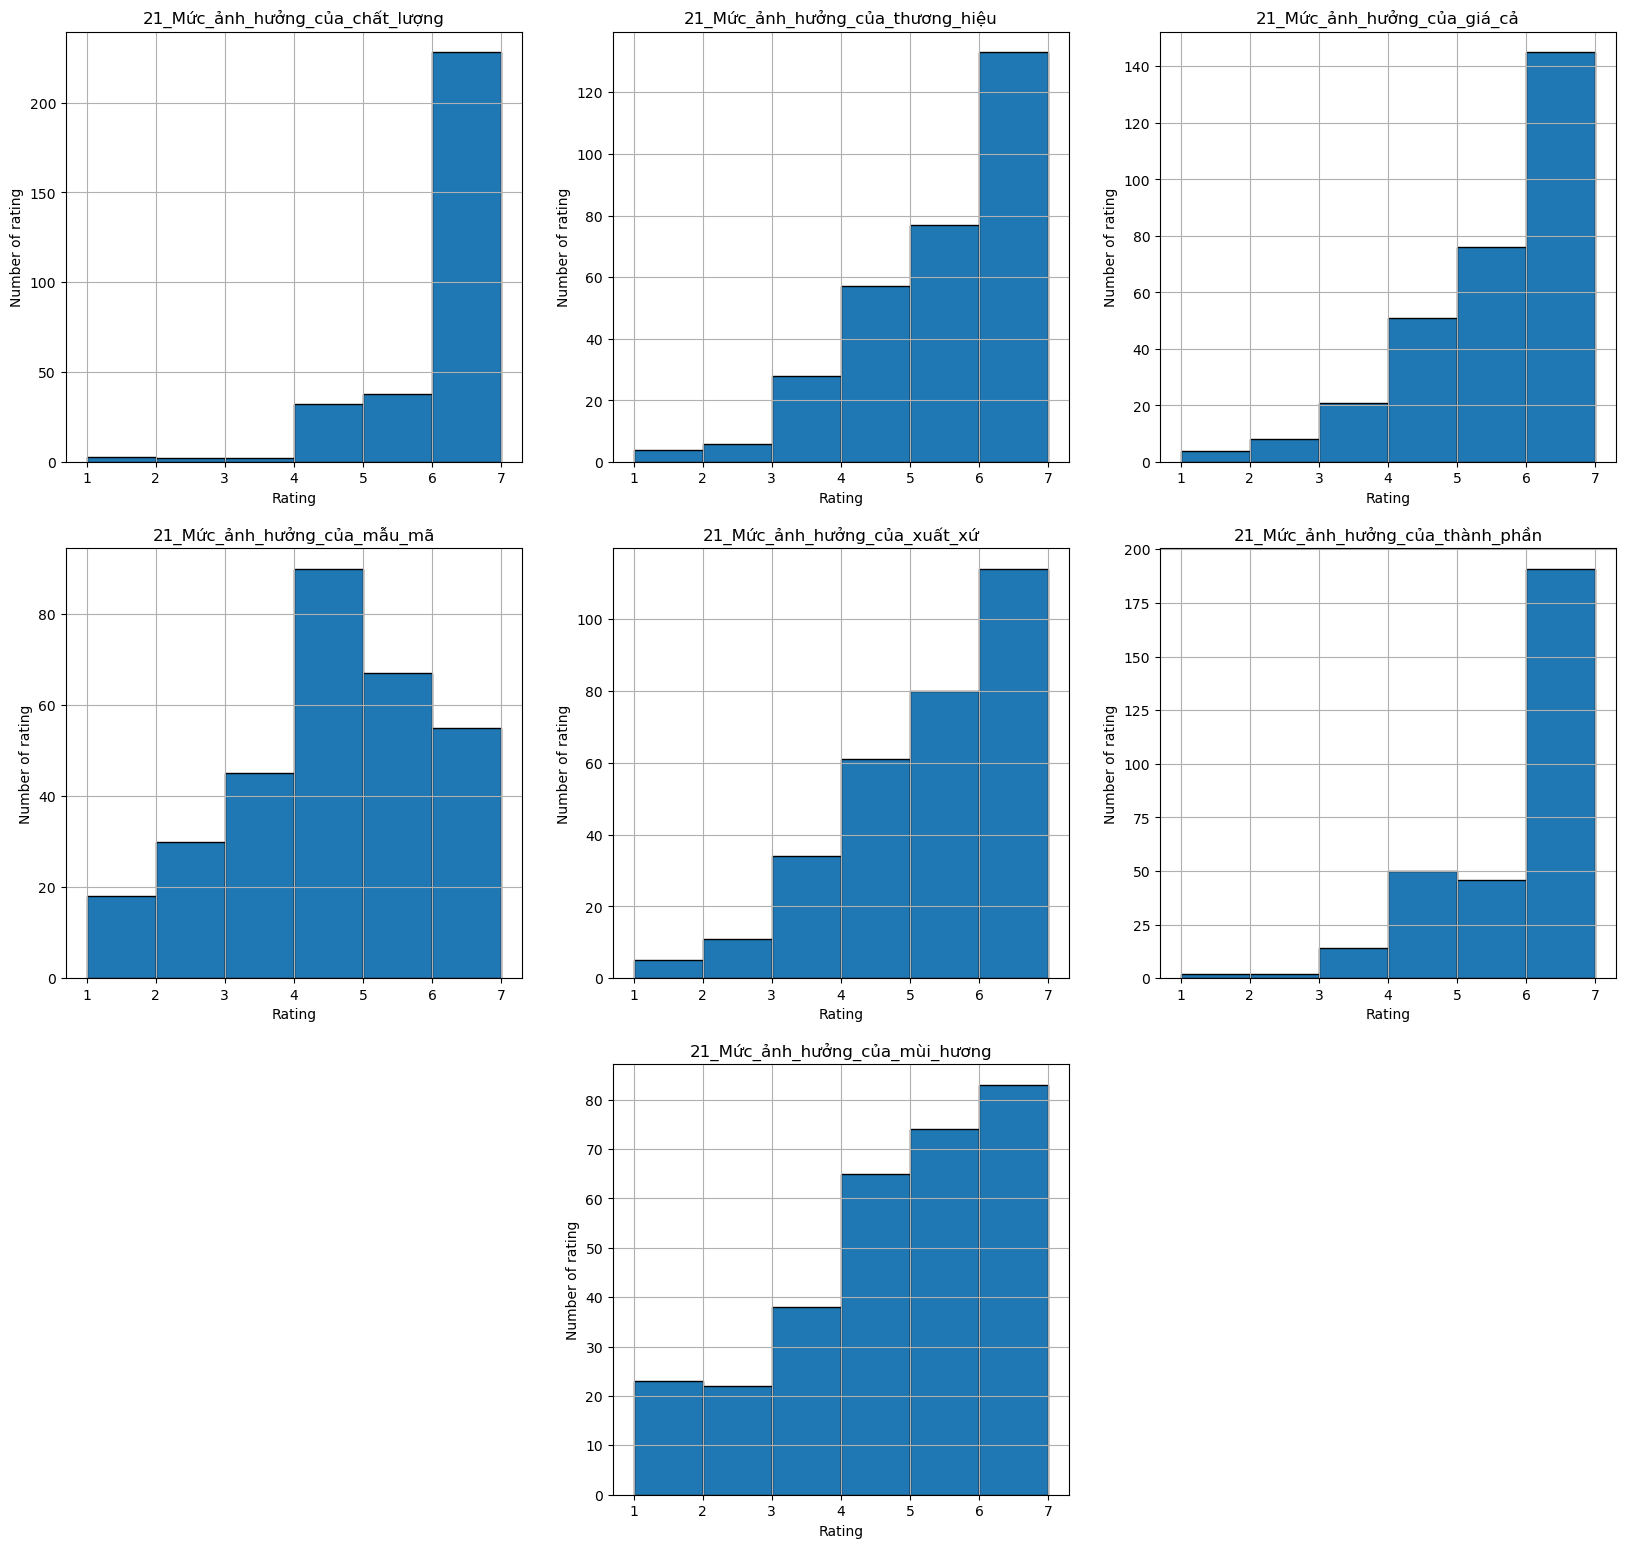

In [18]:
# TODO: draw 7 histogram
fig = plt.figure(figsize=(20,19))
rows, cols = 3, 3
cnt = 1

for col in numeric_col_profile.columns:
    if cnt == 7:
        cnt+=1
    fig.add_subplot(rows, cols, cnt)
    plt.hist(survey_df[col], bins=[1,2,3,4,5,6,7],edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel('Rating')
    plt.ylabel('Number of rating')
    plt.grid()
    cnt+=1
plt.show()

- According to the above distributions, what factors do the survey participants care about when buying facial cleanser? Why?

    **TODO**: It seems like the ingredient and quality of the product. Because most of people rate 2 factors at 7 points.

- This is a crucial insight since it offered data that may be used to plan marketing campaigns or the development of new product manufacturing plans.

- After handling numeric columns, you will handle categorical columns. Note that there are 2 type of survey questions:
    - Multiple choice, single answer: In this lab, it is not required to pre-process these columns.
    - Multiple choice, multiple answer: Have to pre-process.

- Here, you will work on the first one. You will perform these following steps:
    - Step #1: For each column, you have to compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding.
        - For example: In `Giới_tính`, we have the number of different attributes is 2 (`Nam` and `Nữ`). The dictionary is `{"Nữ": 244, "Nam": 61}` since there are 244 female participants and 61 male participants.
        - Save your result to a dataframe called `single_cate_profile`. The index column of dataframe is `["num_diff_vals", "distribution"]` and column names are similar to the name of categorical columns.
    - Step #2: Visualize the distribution using pie chart. You can use `for` loop to draw the charts.

In [19]:
single_answer_cols = ['Giới_tính', '2_Loại_da', '3_Tuần_suất_1ngày', '7_Chiết_xuất', '8_Srm_đang_sd', '9_Srm_có_mùi_hương?', '10_Dung_tích', '11_Số_lượng_mua', '12_Chi_tiền_cho_150ml', '13_Tiêu_chí_chọn_srm', '14_Ai_tư_vấn', '18_Tiêu_chí_mua_offline', '19_Tiêu_chí_mua_online', '22_Dùng_thử?', '23_Kỳ_vọng']
df = survey_df[single_answer_cols]
# TODO: code step 1
single_cate_profile = df.copy()
def num_diff_vals(s):
    return s.nunique()
def distribution(s):
    return s.value_counts().to_dict()
single_cate_profile = single_cate_profile.agg([num_diff_vals, distribution])
single_cate_profile

,Giới_tính,2_Loại_da,3_Tuần_suất_1ngày,7_Chiết_xuất,8_Srm_đang_sd,9_Srm_có_mùi_hương?,10_Dung_tích,11_Số_lượng_mua,12_Chi_tiền_cho_150ml,13_Tiêu_chí_chọn_srm,14_Ai_tư_vấn,18_Tiêu_chí_mua_offline,19_Tiêu_chí_mua_online,22_Dùng_thử?,23_Kỳ_vọng
num_diff_vals,2,6,4,2,4,2,4,3,4,6,5,5,5,3,5
distribution,"{'Nữ': 244, 'Nam': 61}","{'Da hỗn hợp': 98, 'Da dầu': 93, 'Da khô': 45,...","{'2 lần/ngày': 191, '1 lần/ngày': 76, 'Ít hơn ...","{'Chiết xuất từ các hoạt chất hóa học': 160, '...","{'Dạng gel': 199, 'Dạng bọt': 39, 'Dạng kem': ...","{'Có': 166, 'Không': 139}","{'Trên 150 ml - 300 ml': 168, '50 ml - 150 ml'...","{'Từ 1-2 sản phẩm/1 lần mua': 273, 'Từ 3-5 sản...","{'Từ 100.000 vnđ - 200.000 vnđ/150 ml': 203, '...","{'Thành phần': 193, 'Xuất xứ': 50, 'Giá cả': 4...","{'Review từ KOL, beauty blogger, người nổi tiế...","{'Uy tín của cửa hàng': 157, 'Nguồn thông tin ...","{'Đánh giá từ những người đã mua': 144, 'Nguồn...","{'Chưa biết': 204, 'Có': 84, 'Không': 17}","{'Sản phẩm chuyên sâu với hiệu quả cao': 138, ..."


In [20]:
# TEST
assert dict(single_cate_profile['Giới_tính']) == {'num_diff_vals': 2, 'distribution': {'Nữ': 244, 'Nam': 61}}
assert dict(single_cate_profile['13_Tiêu_chí_chọn_srm']) == {'num_diff_vals': 6, 'distribution': {'Thành phần': 193, 'Xuất xứ': 50, 'Giá cả': 44, 'Thể tích, dung tích': 9,'Mùi hương': 7,'Bao bì': 2}}

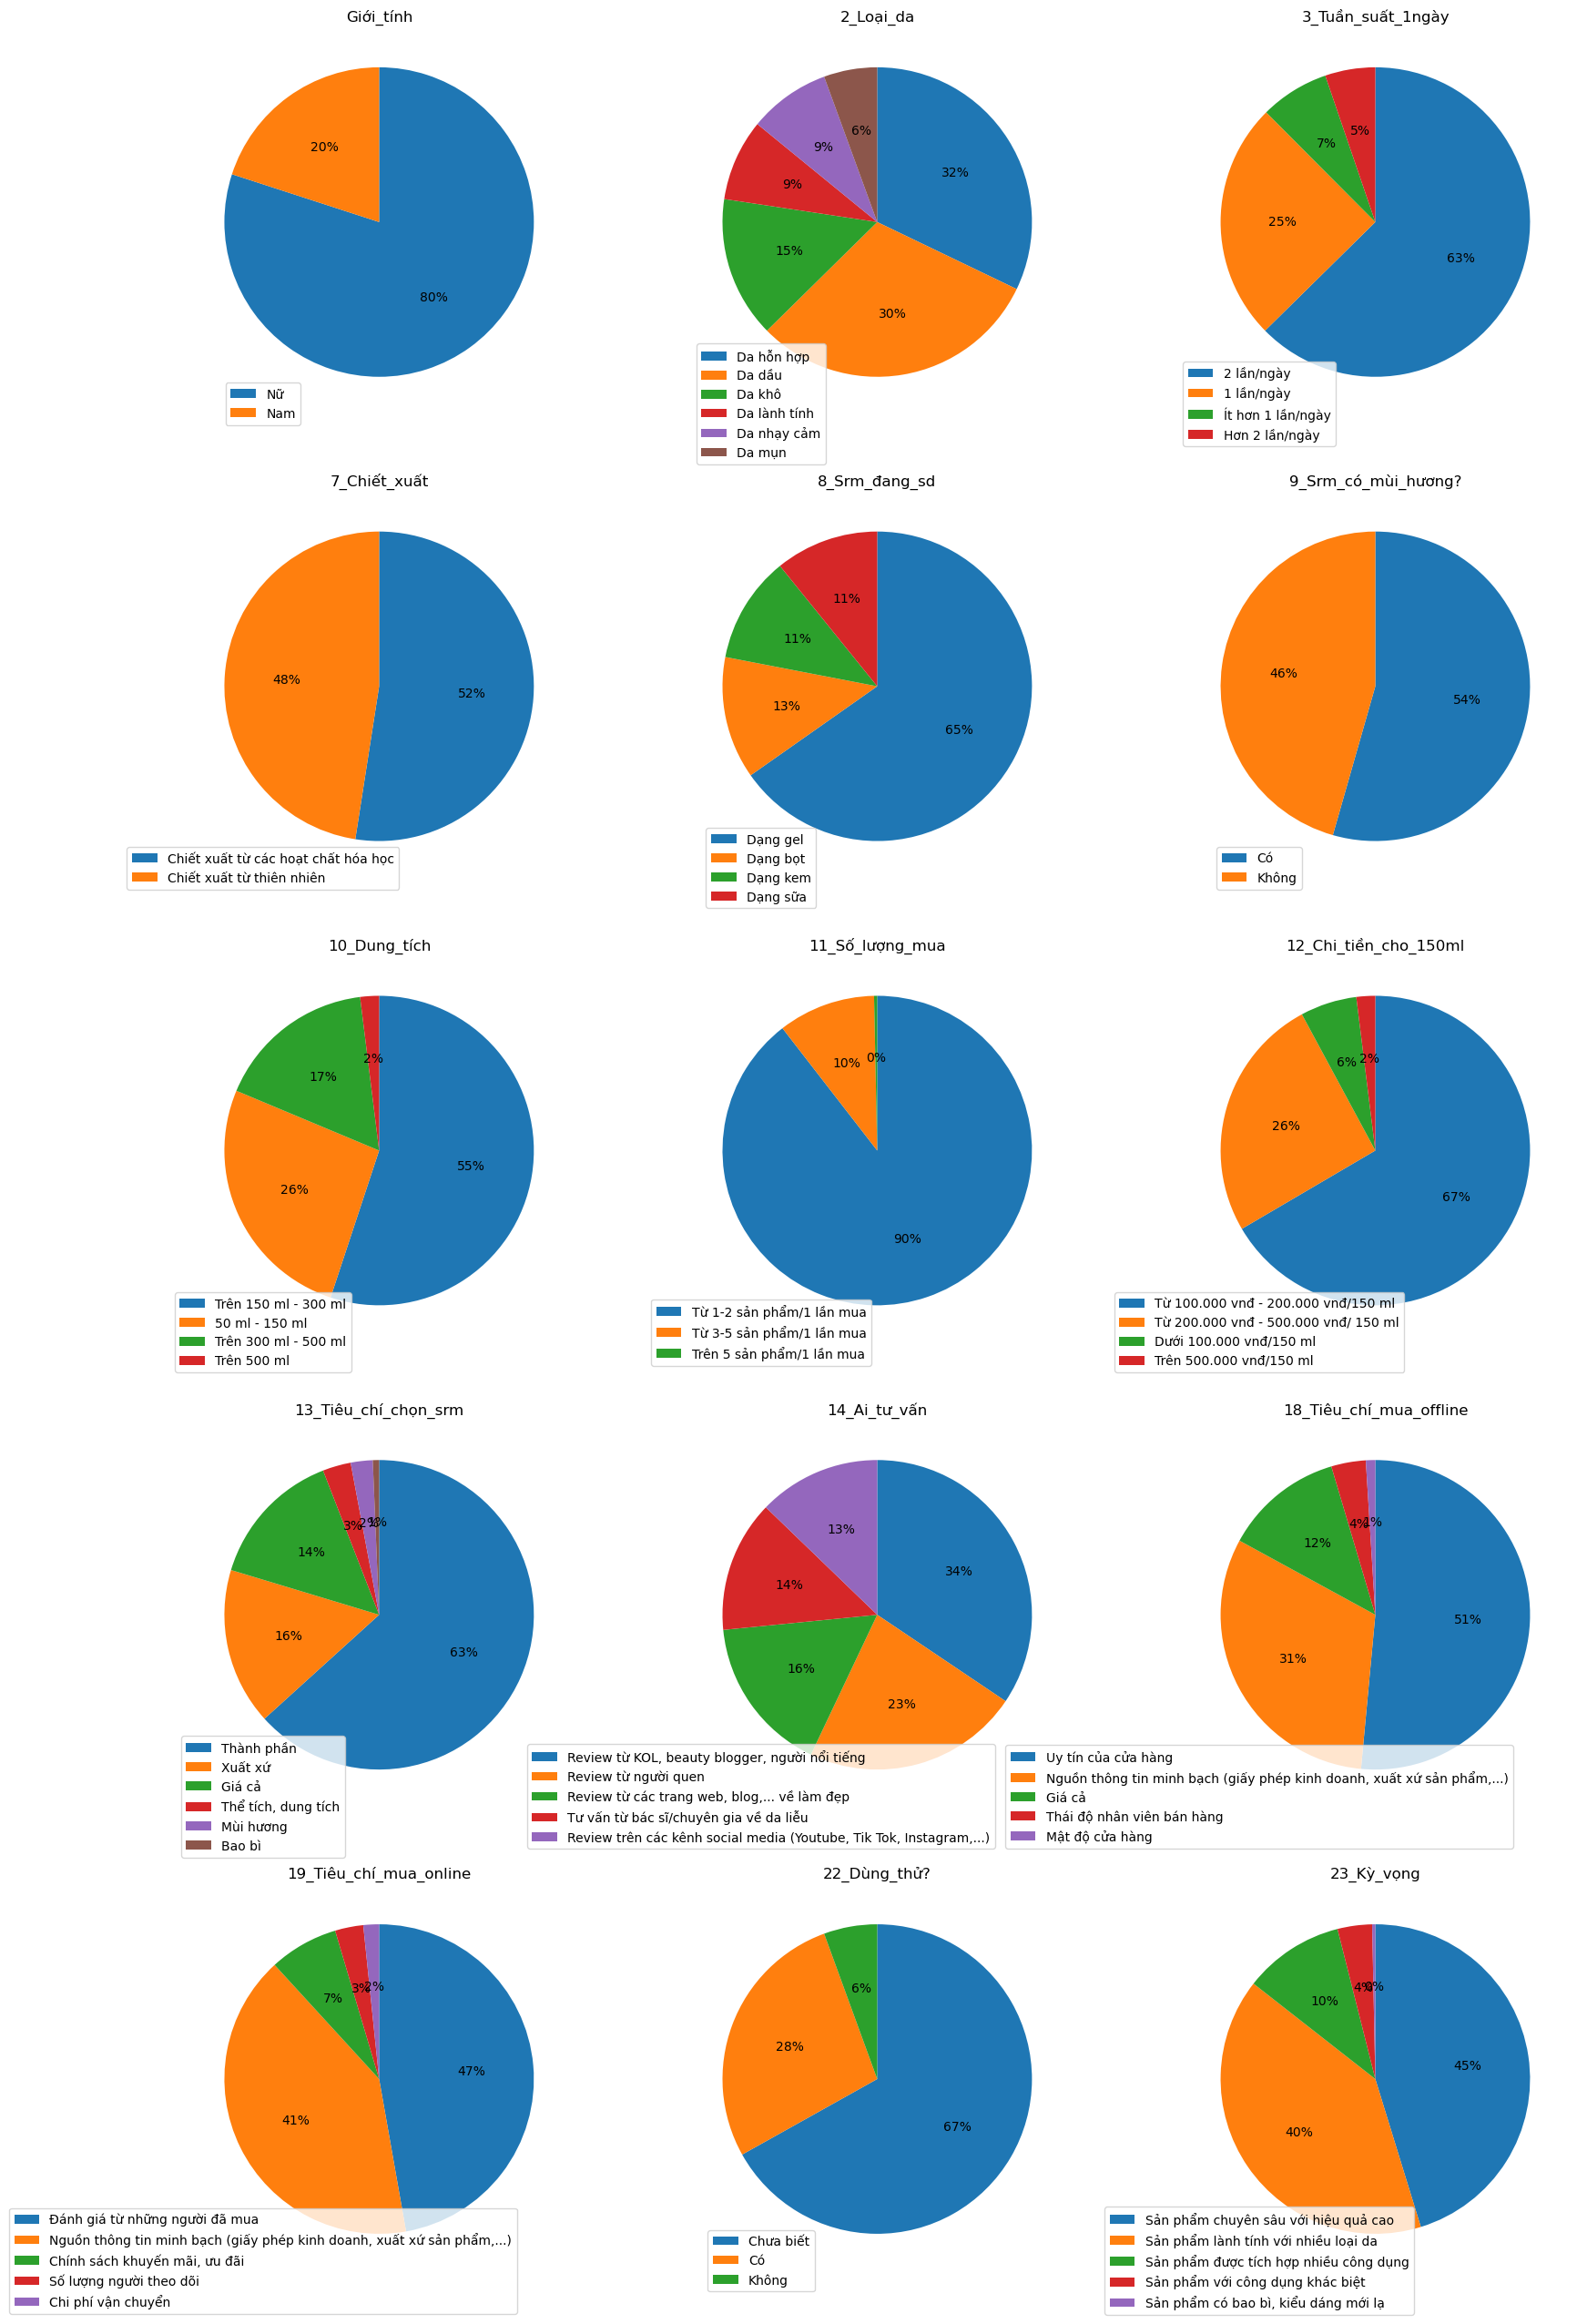

In [21]:
# TODO: code step 2
def pie_plot(df, n, m):
    fig = plt.figure(figsize=(20,32))
    rows, cols = n, m
    cnt = 1
    for col in df.columns:
        fig.add_subplot(rows, cols, cnt)
        plt.pie(x=df.loc['distribution', col].values(),autopct='%1.0f%%',counterclock=False,startangle=90, 
                     wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
        plt.legend(df.loc['distribution', col].keys(),loc='center', bbox_to_anchor=(0.2, 0.03))
        plt.title(f'{col}')
        cnt+=1
    plt.show()
pie_plot(single_cate_profile, 5, 3)

- Look at the above charts, you can gain some information about the distribution of categorical columns with single answer. For example, you can easily point out that most of participants clean their face twice a day, buy the cleanser product according to the instructions of KOLs and beauty blogger,...
- This information will help you a lot in deciding what and how to buy a cleanser product.

- Next, we will compute the distribution of multiple answer columns. You also perform the following familiar steps:
    - Step #1: For each column, you have to compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding. Save your result to a dataframe called `multiple_cate_profile`. Note that in columns `'91_*', '92_*', '93_*'`, there are user-defined values, which are recorded from `Mục khác`. You have to replace these values with `Khác` (you can use `apply` for replacing). For example, column `91_Thích_hương_trái_cây?` has 8 original values (see `./form.pdf`). The rest values will be replace with `Khác`.
    - Step #2: Visualize the 5 values with the highest frequency of occurrence using bar chart. You can use `for` loop to draw the charts.

- Note that do not touch the `df` since it will be used to check your answer.

In [22]:
multi_answer_cols = ['1_Mục_đích_sd_srm','4_Sd_khi_nào','5_Mua_ở_đâu','6_Quảng_cáo_ở_đâu','91_Thích_hương_trái_cây?','92_Thích_hương_rau_củ?','93_Thích_hương_hoa_cỏ?','15_Xuất_xứ','16_Mua_online_ở_đâu','17_Mua_offline_ở_đâu','20_Lo_ngại_về_srm']
df = survey_df[multi_answer_cols]

# TODO: code step 1
df_copy = df.copy()
sub_df = df_copy.loc[~df_copy.isnull().any(axis=1), df_copy.columns[df_copy.columns.str.startswith('9')]]

# # replace all values that differ from the origin_values
origin_values_91 = ['Dâu', 'Táo', 'Mâm xôi', 'Cherry', 'Việt quất', 'Đào', 'Cam', 'Chanh', 'Khác']
origin_values_92 = ['Dưa leo', 'Thảo mộc', 'Nha đam', 'Rau má', 'Cà chua', 'Cần tây', 'Khác']
origin_values_93 = ['Lavender', 'Hoa hồng', 'Anh đào', 'Trà xanh', 'Hoa sứ', 'Hoa cúc', 'Khác']

sub_df = sub_df.apply(lambda x: x.str.strip().replace(r'[?,]+$','',regex=True))
sub_df = sub_df.apply(lambda x: x.str.split(', '))

sub_df['91_Thích_hương_trái_cây?'] = sub_df['91_Thích_hương_trái_cây?'].apply(lambda x: ['Khác' if item not in origin_values_91 else item for item in x])
sub_df['92_Thích_hương_rau_củ?'] = sub_df['92_Thích_hương_rau_củ?'].apply(lambda x: ['Khác' if item not in origin_values_92 else item for item in x])
sub_df['93_Thích_hương_hoa_cỏ?'] = sub_df['93_Thích_hương_hoa_cỏ?'].apply(lambda x: ['Khác' if item not in origin_values_93 else item for item in x])

sub_df['91_Thích_hương_trái_cây?'] = sub_df['91_Thích_hương_trái_cây?'].apply(lambda x: ', '.join(map(str, x)))
sub_df['92_Thích_hương_rau_củ?'] = sub_df['92_Thích_hương_rau_củ?'].apply(lambda x: ', '.join(map(str, x)))
sub_df['93_Thích_hương_hoa_cỏ?'] = sub_df['93_Thích_hương_hoa_cỏ?'].apply(lambda x: ', '.join(map(str, x)))
df_copy.loc[~df_copy.isnull().any(axis=1), df_copy.columns[df_copy.columns.str.startswith('9')]] = sub_df
multiple_cate_profile = df_copy

def num_diff_vals(s):
    s=s.str.split(', ')
    s=s.explode()
    return s.nunique()
def distribution(s):
    s=s.str.split(', ')
    s=s.explode()
    return s.value_counts().to_dict()
multiple_cate_profile = multiple_cate_profile.agg([num_diff_vals, distribution])
multiple_cate_profile

,1_Mục_đích_sd_srm,4_Sd_khi_nào,5_Mua_ở_đâu,6_Quảng_cáo_ở_đâu,91_Thích_hương_trái_cây?,92_Thích_hương_rau_củ?,93_Thích_hương_hoa_cỏ?,15_Xuất_xứ,16_Mua_online_ở_đâu,17_Mua_offline_ở_đâu,20_Lo_ngại_về_srm
num_diff_vals,7,5,9,8,9,7,7,11,3,6,4
distribution,{'Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...':...,"{'Trước khi đi ngủ': 242, 'Sau khi thức dậy': ...","{'Các sàn thương mại điện tử': 213, 'Các cửa h...","{'Truyền thông; quảng cáo': 205, 'Tự tìm hiểu'...","{'Đào': 61, 'Táo': 44, 'Cam': 39, 'Cherry': 36...","{'Nha đam': 114, 'Thảo mộc': 72, 'Rau má': 47,...","{'Trà xanh': 92, 'Hoa hồng': 71, 'Lavender': 6...","{'Hàn Quốc': 184, 'Nhật Bản': 111, 'Mỹ': 100, ...","{'Sàn thương mại điện tử': 253, 'Website của h...","{'Các cửa hàng mỹ phẩm': 198, 'Cửa hàng chính ...","{'Hàng giả; hàng nhái': 216, 'Tác dụng phụ; gâ..."


In [23]:
# TEST
assert list(multiple_cate_profile.to_numpy()[0]) == [7, 5, 9, 8, 9, 7, 7, 11, 3, 6, 4]
assert dict(multiple_cate_profile['20_Lo_ngại_về_srm']) == {'num_diff_vals': 4, 'distribution': {'Hàng giả; hàng nhái': 216, 'Tác dụng phụ; gây kích ứng; bong tróc da': 141, 'Sản phẩm không có nguồn gốc rõ ràng': 104, 'Không có hiệu quả hoặc hiệu quả kém': 44}}
assert dict(multiple_cate_profile['91_Thích_hương_trái_cây?']) == {'num_diff_vals': 9, 'distribution': {'Đào': 61, 'Táo': 44, 'Cam': 39, 'Cherry': 36, 'Chanh': 34, 'Dâu': 34, 'Việt quất': 33, 'Khác': 13, 'Mâm xôi': 11}}
assert dict(multiple_cate_profile['92_Thích_hương_rau_củ?']) == {'num_diff_vals': 7, 'distribution': {'Nha đam': 114, 'Thảo mộc': 72, 'Rau má': 47, 'Dưa leo': 35, 'Cà chua': 20, 'Cần tây': 5, 'Khác': 4}}
assert dict(multiple_cate_profile['93_Thích_hương_hoa_cỏ?']) == {'num_diff_vals': 7, 'distribution': {'Trà xanh': 92, 'Hoa hồng': 71, 'Lavender': 68, 'Anh đào': 49, 'Hoa cúc': 20, 'Hoa sứ': 7, 'Khác': 3}}

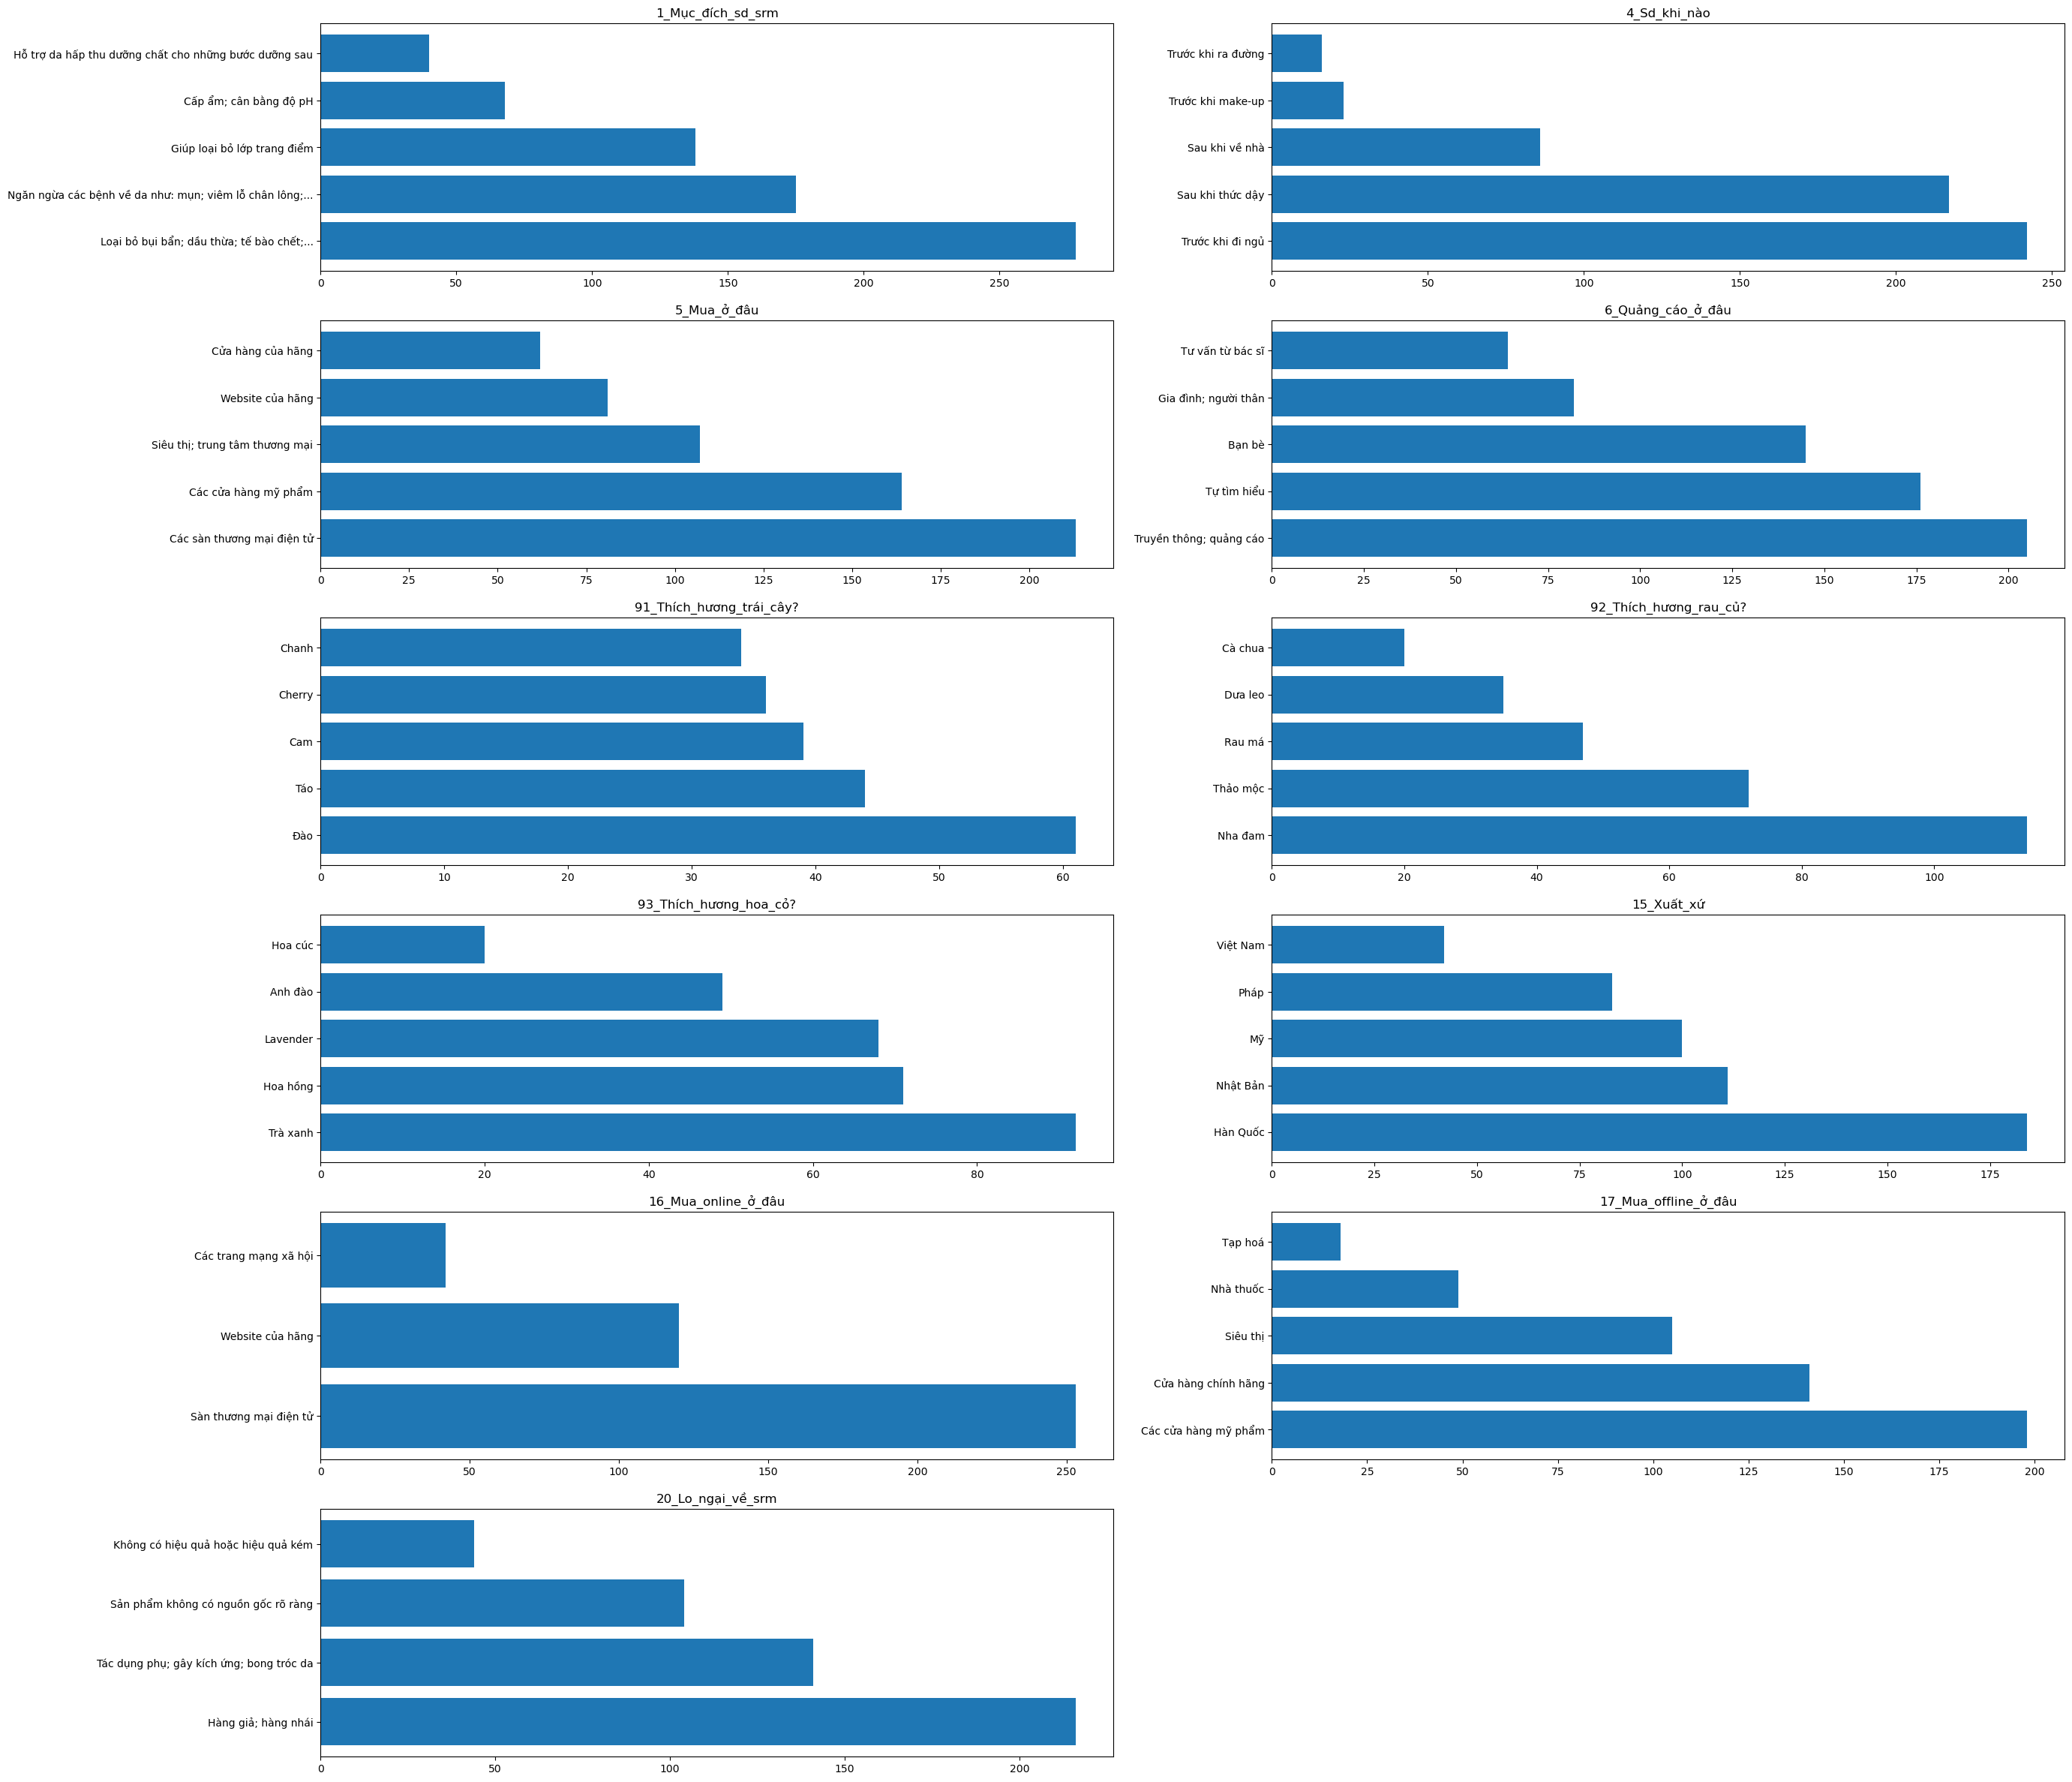

In [24]:
# TODO: code step 2
fig = plt.figure(figsize=(30, 30))
rows, cols = 6, 2
cnt = 1
for col in multiple_cate_profile.columns:
    ax = fig.add_subplot(rows, cols, cnt)
    plt.barh(y=np.array(list(multiple_cate_profile.loc['distribution', col].keys()))[0:5],width=np.array(list(multiple_cate_profile.loc['distribution', col].values()))[0:5])
    plt.title(f'{col}')
    cnt+=1
plt.show()

- Finally, you will perform **one-hot encoding** on categorical columns. One-hot encoding is a popular pre-processing method for categorical data. What is one-hot encoding? What does it use for?

    **TODO**: One-hot encoding is a common method for dealing with categorical data in machine learning. Categorical variables must be changed in the pre-processing section since machine learning models require numeric input variables. Nominal or ordinal data can be found in categorical data.

- Since performing one-hot encoding on single answer columns is quite easy, you will perform this technique on multiple answer columns. In this part, you can use `for` loop to loop through the column and pre-process them. However, it would be better if you don't use loop for this task. The final dataframe is save to `one_hot_df`

- Note that do not touch the `df` since it will be used to check your answer.

In [25]:
# TODO: perform one-hot encoding on multiple_answer_cols
one_hot_df = pd.DataFrame(df_copy.stack().str.split(', ', expand=True).stack().unstack(1))
one_hot_df = pd.get_dummies(one_hot_df, dtype=np.int64)
one_hot_df = one_hot_df.groupby(level=0).sum()
one_hot_df

,1_Mục_đích_sd_srm_Cấp ẩm; cân bằng độ pH,1_Mục_đích_sd_srm_Giúp loại bỏ lớp trang điểm,1_Mục_đích_sd_srm_Hỗ trợ da căng bóng,1_Mục_đích_sd_srm_Hỗ trợ da hấp thu dưỡng chất cho những bước dưỡng sau,1_Mục_đích_sd_srm_Hỗ trợ làm trắng da,1_Mục_đích_sd_srm_Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,1_Mục_đích_sd_srm_Ngăn ngừa các bệnh về da như: mụn; viêm lỗ chân lông;...,4_Sd_khi_nào_Sau khi thức dậy,4_Sd_khi_nào_Sau khi về nhà,4_Sd_khi_nào_Trước khi make-up,...,17_Mua_offline_ở_đâu_Các cửa hàng mỹ phẩm,17_Mua_offline_ở_đâu_Cửa hàng chính hãng,17_Mua_offline_ở_đâu_Cửa hàng tiện lợi,17_Mua_offline_ở_đâu_Nhà thuốc,17_Mua_offline_ở_đâu_Siêu thị,17_Mua_offline_ở_đâu_Tạp hoá,20_Lo_ngại_về_srm_Hàng giả; hàng nhái,20_Lo_ngại_về_srm_Không có hiệu quả hoặc hiệu quả kém,20_Lo_ngại_về_srm_Sản phẩm không có nguồn gốc rõ ràng,20_Lo_ngại_về_srm_Tác dụng phụ; gây kích ứng; bong tróc da
0,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,0,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,0,1,0
4,1,0,0,0,0,1,1,1,0,0,...,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
331,0,0,0,0,0,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
332,1,0,1,0,0,0,1,0,1,0,...,1,1,1,1,1,1,1,0,1,0
334,1,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0


In [26]:
# TEST
for i in range(len(df)):
    if i != 7 and i != 168:
        assert sum(one_hot_df.iloc[i]) == sum([len(item.split(', ')) if item is not np.nan else 0 for item in df.iloc[i]])

In [27]:
df.loc[[7, 168], :]

,1_Mục_đích_sd_srm,4_Sd_khi_nào,5_Mua_ở_đâu,6_Quảng_cáo_ở_đâu,91_Thích_hương_trái_cây?,92_Thích_hương_rau_củ?,93_Thích_hương_hoa_cỏ?,15_Xuất_xứ,16_Mua_online_ở_đâu,17_Mua_offline_ở_đâu,20_Lo_ngại_về_srm
7,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...","Sau khi thức dậy, Sau khi về nhà, Trước khi đi...","Các sàn thương mại điện tử, Các cửa hàng mỹ ph...","Gia đình; người thân, Tự tìm hiểu, Bạn bè","Trà xanh, tràm trà, bạc hà",Thảo mộc,"Trà xanh, Tràm trà","Hàn Quốc, Pháp, Anh",Sàn thương mại điện tử,"Cửa hàng chính hãng, Các cửa hàng mỹ phẩm","Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ..."
168,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Sau khi về nhà,"Các sàn thương mại điện tử, Website của hãng, ...","Tư vấn từ bác sĩ, Gia đình; người thân, Tự tìm...",NaN,NaN,NaN,Pháp,Sàn thương mại điện tử,"Cửa hàng chính hãng, Siêu thị, Tạp hoá",Sản phẩm không có nguồn gốc rõ ràng


- What does the test mean? In the test, why don't I test the row #7 and #168?

    **TODO** (OPTIONAL): the test means that check the sum of each row in `one_hot_df` with the total length of each lists of string (because when using consider each row the command `split` will split the value at a position in the table that will create a list of string but it also has to consider the column so that it will create number of list string equal to the number of columns) and if the value at this position is `np.nan` it will set as 0. And the reason you don't test row #7 and #168 is 

## 4. Question proposing & Answering

- In this section, you are going to answer my 2 questions and prose 1 question. Note that these questions can all be answered by analyzing data. Theoretically, the proposed question have to benefit at a certain level. But this is exercise about `Pandas`, my questions can be aimed more at technical side than the meaningful side. But your question has to be meaningful :v

### 4.0. What is the difference in scent preference when choosing a facial cleanser between male and female participants?

- In order to answer this question, You have to compare the choice of scent between male and female participants. Group bar chart might be a good option to do so.
- First, you have to filter needed columns (`'91_*', '92_*', '93_*'`) from `one_hot_df` and place them in a new dataframe call `scent_df`. You can use `for` loop to get the column names if needed.
- Then, group by `Giới_tính` to find out the distribution of scent for each gender. Save the result to `distribution_91, distribution_92, distribution_93`. You can observe the `distribution_91` in the cell code below.
- Visualize the result in a group bar chart. Groups are scents. In each group, there will be 2 columns (`Nam` and `Nữ`)

In [28]:
# TODO: answer the question
df_full = pd.concat((survey_df, one_hot_df),axis=1)
list_9_name = df_full.columns[df_full.columns.str.startswith('9')].to_list()
del list_9_name[0:4]
list_9_name.append('Giới_tính')

df_full = df_full.loc[:, list_9_name]
distribution = df_full.groupby('Giới_tính').sum()
distribution_91 = distribution.loc[:, distribution.columns[distribution.columns.str.startswith('91_')]]
distribution_92 = distribution.loc[:, distribution.columns[distribution.columns.str.startswith('92_')]]
distribution_93 = distribution.loc[:, distribution.columns[distribution.columns.str.startswith('93_')]]
distribution_91
# distribution_91

,91_Thích_hương_trái_cây?_Cam,91_Thích_hương_trái_cây?_Chanh,91_Thích_hương_trái_cây?_Cherry,91_Thích_hương_trái_cây?_Dâu,91_Thích_hương_trái_cây?_Khác,91_Thích_hương_trái_cây?_Mâm xôi,91_Thích_hương_trái_cây?_Táo,91_Thích_hương_trái_cây?_Việt quất,91_Thích_hương_trái_cây?_Đào
Giới_tính,,,,,,,,,
Nam,9,10,8,6,2,2,11,12,12
Nữ,30,24,28,28,11,9,33,21,49


In [29]:
# TEST
assert dict(distribution_91['91_Thích_hương_trái_cây?_Việt quất']) == {'Nam': 12, 'Nữ': 21}
assert dict(distribution_92['92_Thích_hương_rau_củ?_Cần tây']) == {'Nam': 2, 'Nữ': 3}
assert dict(distribution_93['93_Thích_hương_hoa_cỏ?_Anh đào']) == {'Nam': 7, 'Nữ': 42}

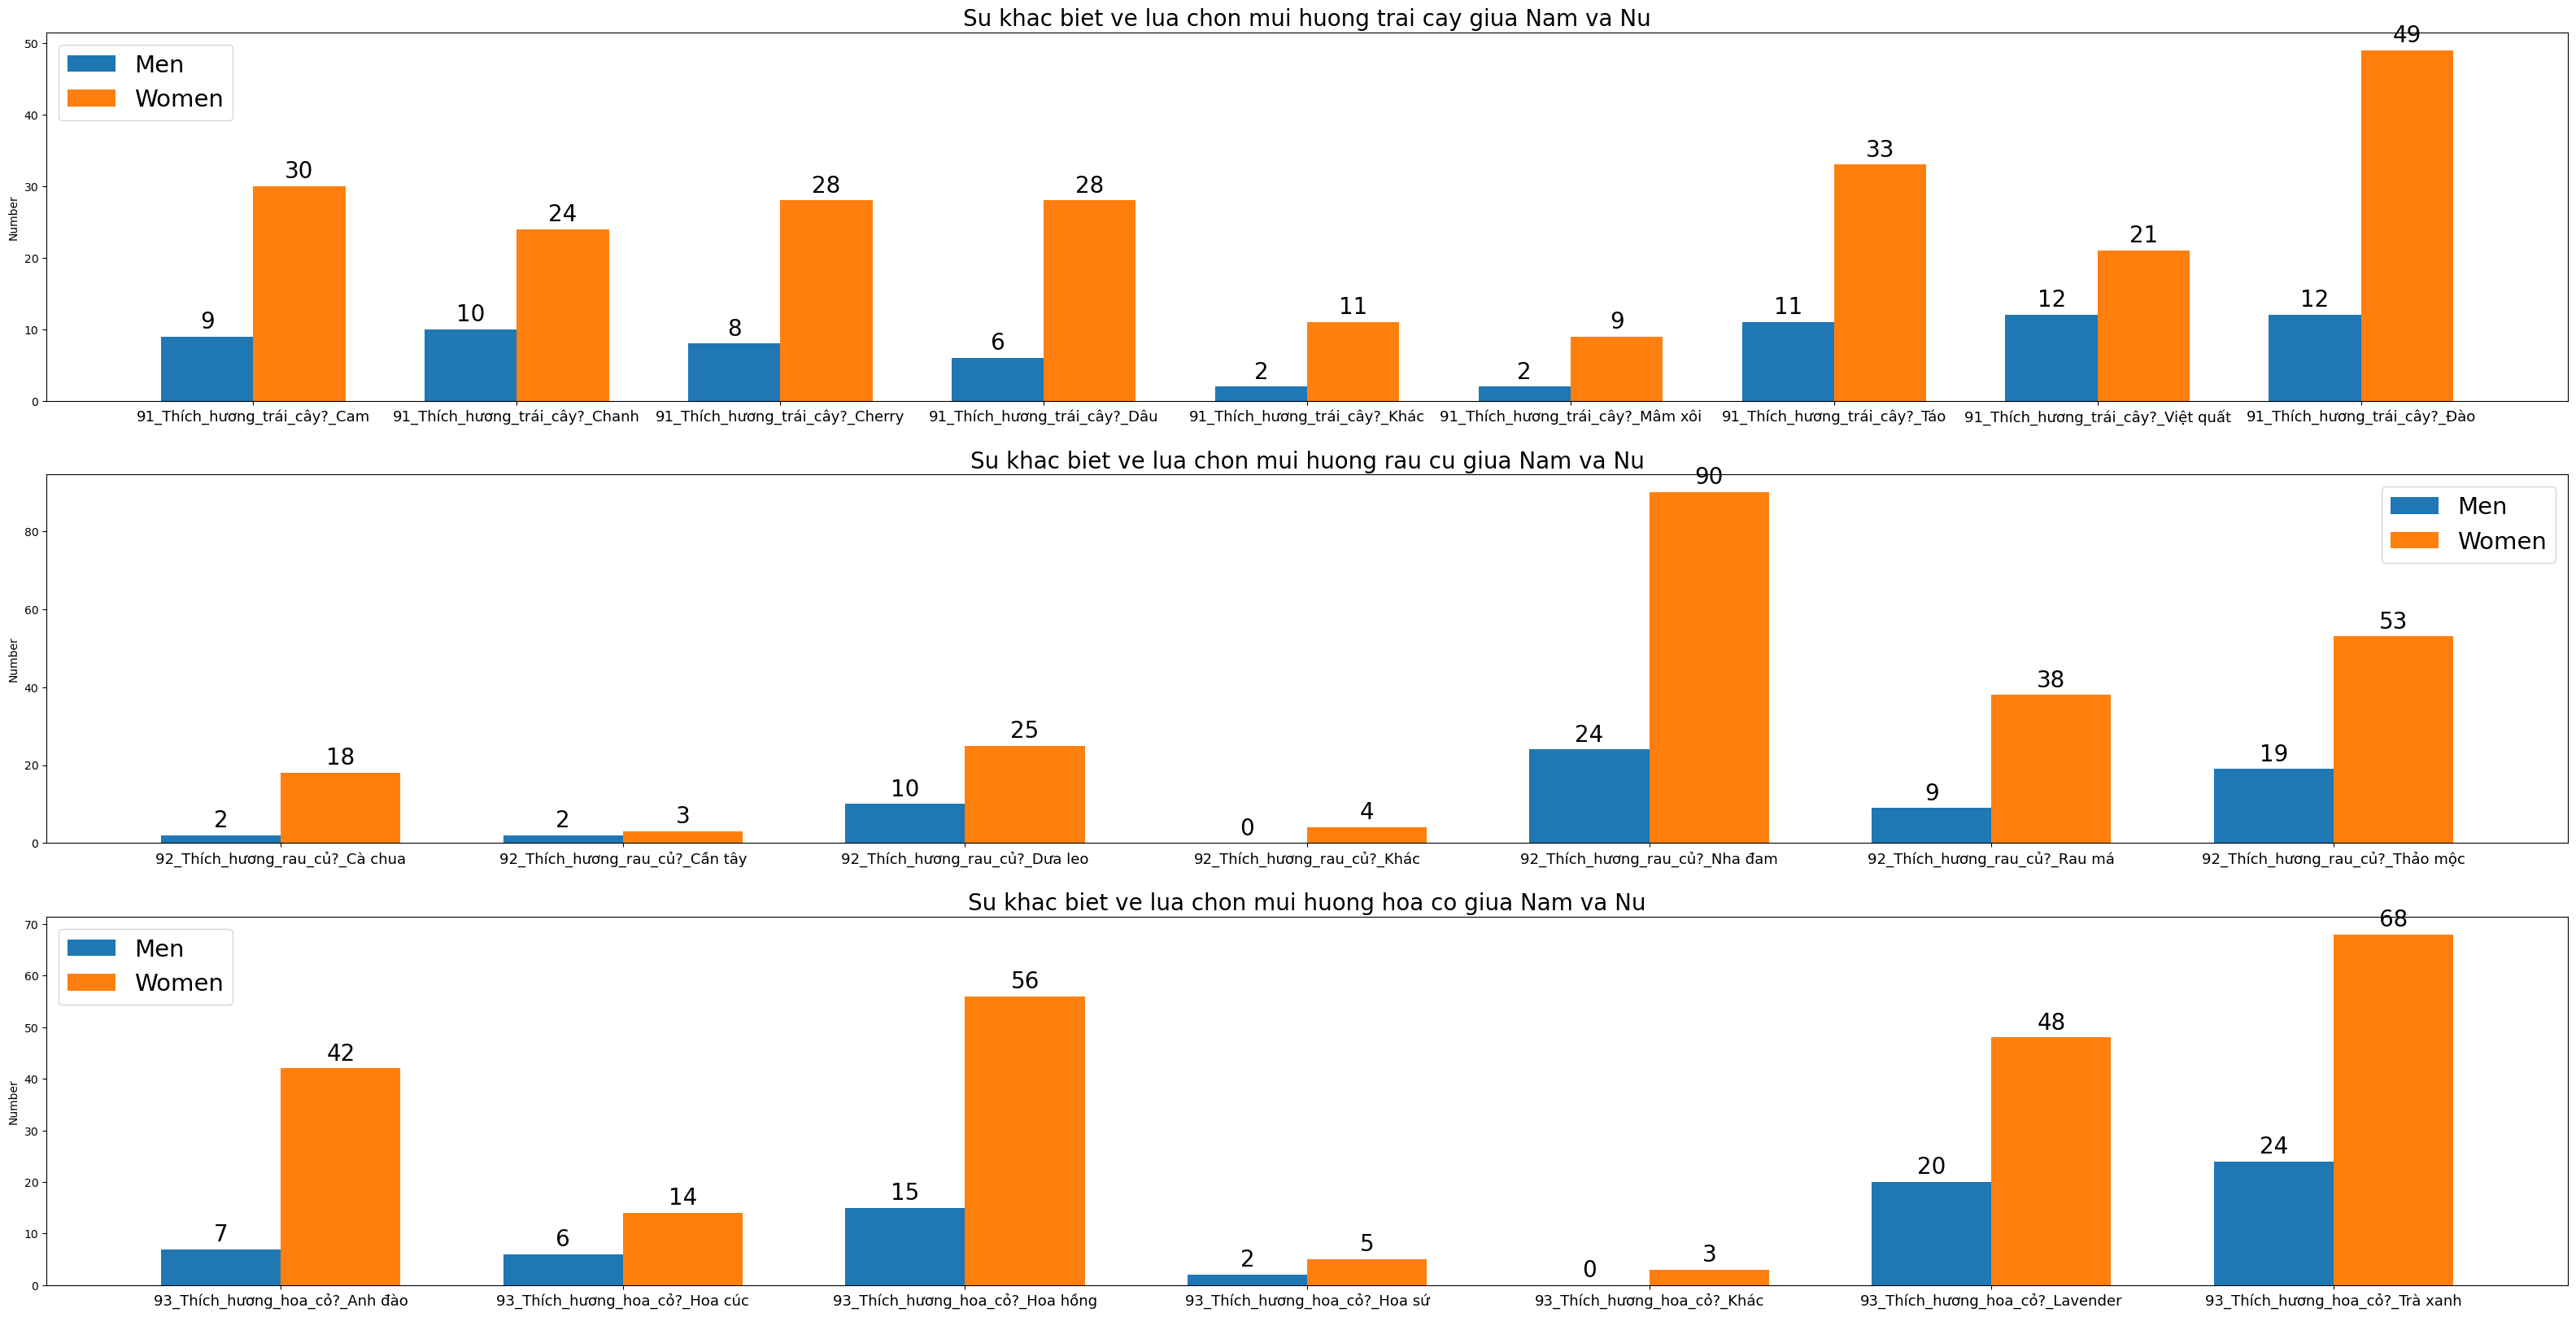

In [30]:
# TODO: Visualize 3 distribution. Your figure will look like the chart below
label_91_dis = distribution_91.keys()
dis_Nam_91_dis = distribution_91.values[0]
dis_Nu_91_dis = distribution_91.values[1]

x = np.arange(len(label_91_dis))
width = 0.35
fig, axs = plt.subplots(3,1,figsize=(40,20))
rects1 = axs[0].bar(x - width/2, dis_Nam_91_dis, width, label='Men')
rects2 = axs[0].bar(x + width/2, dis_Nu_91_dis, width, label='Women')
axs[0].set_ylabel('Number')
axs[0].set_title('Su khac biet ve lua chon mui huong trai cay giua Nam va Nu',fontsize=20)
axs[0].set_xticks(x)
axs[0].set_xticklabels(label_91_dis,fontsize=13)
axs[0].legend(fontsize=21)
def autolabel(rects, i):
    for rect in rects:
        height = rect.get_height()
        axs[i].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=20)
autolabel(rects1, 0)
autolabel(rects2, 0)

label_92_dis = distribution_92.keys()
dis_Nam_92_dis = distribution_92.values[0]
dis_Nu_92_dis = distribution_92.values[1]

x = np.arange(len(label_92_dis))
rects1 = axs[1].bar(x - width/2, dis_Nam_92_dis, width, label='Men')
rects2 = axs[1].bar(x + width/2, dis_Nu_92_dis, width, label='Women')
axs[1].set_ylabel('Number')
axs[1].set_title('Su khac biet ve lua chon mui huong rau cu giua Nam va Nu',fontsize=20)
axs[1].set_xticks(x)
axs[1].set_xticklabels(label_92_dis,fontsize=13)
axs[1].legend(fontsize=21)
autolabel(rects1, 1)
autolabel(rects2, 1)

label_93_dis = distribution_93.keys()
dis_Nam_93_dis = distribution_93.values[0]
dis_Nu_93_dis = distribution_93.values[1]

x = np.arange(len(label_93_dis))
rects1 = axs[2].bar(x - width/2, dis_Nam_93_dis, width, label='Men')
rects2 = axs[2].bar(x + width/2, dis_Nu_93_dis, width, label='Women')
axs[2].set_ylabel('Number')
axs[2].set_title('Su khac biet ve lua chon mui huong hoa co giua Nam va Nu',fontsize=20)
axs[2].set_xticks(x)
axs[2].set_xticklabels(label_93_dis,fontsize=13)
axs[2].legend(fontsize=21)
autolabel(rects1, 2)
autolabel(rects2, 2)

### 4.1. What is the most important factor when choosing a facial cleanser between male and female participants?

- Hint: See the question #22 in `./form.pdf`.
- This question can be answered in the same way as question 1 but it is much easier because the data is single answer data.
    - Save the distribution of male and female participants to 2 dictionaries named `male_factors` and `female_factors`
    - Then visualize the result as question 1

In [31]:
# TODO: answer the question
one_hot_new_df = pd.get_dummies(survey_df.iloc[:, 17], dtype=np.int64)
new_df = pd.concat((survey_df.iloc[:, 1], one_hot_new_df), axis=1)
my_dic = new_df.groupby('Giới_tính').sum()
male_factors = my_dic.loc['Nam', :].to_dict()
female_factors = my_dic.loc['Nữ', :].to_dict()
male_factors, female_factors

({'Bao bì': 1,
  'Giá cả': 10,
  'Mùi hương': 2,
  'Thành phần': 32,
  'Thể tích, dung tích': 2,
  'Xuất xứ': 14},
 {'Bao bì': 1,
  'Giá cả': 34,
  'Mùi hương': 5,
  'Thành phần': 161,
  'Thể tích, dung tích': 7,
  'Xuất xứ': 36})

In [32]:
# TEST
assert male_factors == {'Thành phần': 32, 'Xuất xứ': 14, 'Giá cả': 10, 'Mùi hương': 2, 'Thể tích, dung tích': 2, 'Bao bì': 1}
assert female_factors == {'Thành phần': 161, 'Xuất xứ': 36, 'Giá cả': 34, 'Thể tích, dung tích': 7, 'Mùi hương': 5, 'Bao bì': 1}

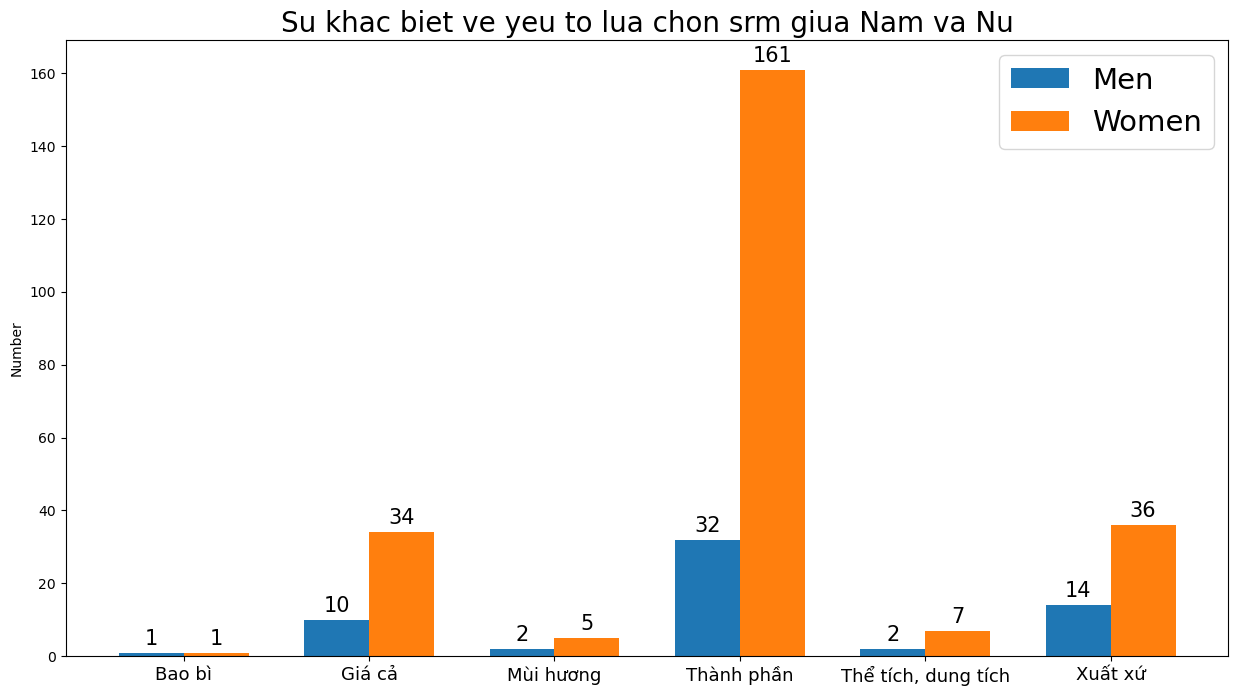

In [33]:
# TODO: Visualize\
labels = male_factors.keys()
y_male = male_factors.values()
y_female = female_factors.values()
fig, axs = plt.subplots(figsize=(15,8))
width = 0.35
x = np.arange(len(labels))
rects1 = axs.bar(x - width/2, y_male, width, label='Men')
rects2 = axs.bar(x + width/2, y_female, width, label='Women')
axs.set_ylabel('Number')
axs.set_title('Su khac biet ve yeu to lua chon srm giua Nam va Nu',fontsize=20)
axs.set_xticks(x)
axs.set_xticklabels(labels,fontsize=13)
axs.legend(fontsize=21)
def autolabel_2(rects):
    for rect in rects:
        height = rect.get_height()
        axs.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=15)
autolabel_2(rects1)
autolabel_2(rects2)
plt.show()

### 4.2. Your question goes here

- Do not use the same motif (compare male and female) for your proposed question.
- What are the purposes of answering your questions?
- Answer your question then visualize if needed.

**Question:** Which distribution channels are facial cleansers sold the most through?

**Purpose:** Answering this question provides us valuable insights into consumer behavior, market analysis, retail strategy, and online presence. This information helps businesses make informed decisions about marketing, product placement, and reaching their target audience effectively. It also allows for a better understanding of consumer preferences and market trends, ultimately driving business success in the skincare industry.

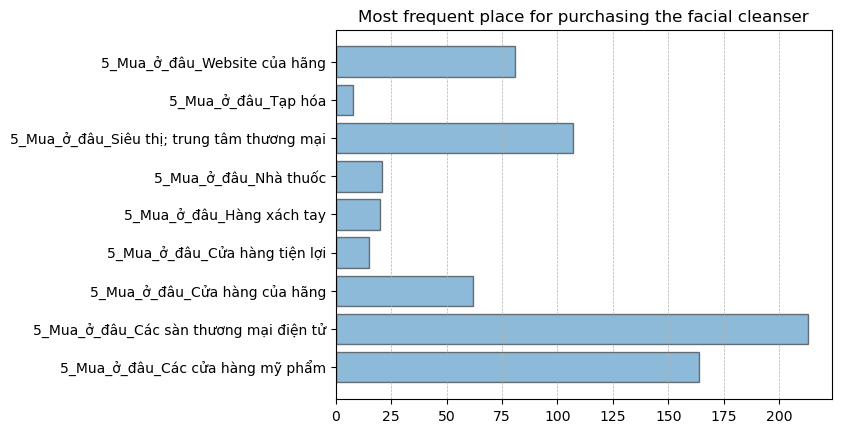

In [34]:
# TODO: answer your question here
df_most_common_place = one_hot_df.loc[:, one_hot_df.columns[one_hot_df.columns.str.startswith('5_Mua_ở_đâu')]]
data = df_most_common_place.sum(axis=0)
plt.barh(y=data.keys(),width=data.values,alpha=0.5,edgecolor='black')
plt.grid(axis='x', linestyle='--',linewidth=0.5)
plt.title('Most frequent place for purchasing the facial cleanser');

**Answer the question:** As we can see that Online marketplaces and cosmetic stores were the most popular channels, with 213 and 164 mentions, respectively. Brand stores had 62 mentions, while supermarkets and shopping centers had 107 mentions. Other channels, such as pharmacies and convenience stores, had fewer mentions. Overall, online marketplaces and cosmetic stores were the preferred options for buying facial cleansers.

In [35]:
# TODO (OPTIONAL): visualize
data

5_Mua_ở_đâu_Các cửa hàng mỹ phẩm              164
5_Mua_ở_đâu_Các sàn thương mại điện tử        213
5_Mua_ở_đâu_Cửa hàng của hãng                  62
5_Mua_ở_đâu_Cửa hàng tiện lợi                  15
5_Mua_ở_đâu_Hàng xách tay                      20
5_Mua_ở_đâu_Nhà thuốc                          21
5_Mua_ở_đâu_Siêu thị; trung tâm thương mại    107
5_Mua_ở_đâu_Tạp hóa                             8
5_Mua_ở_đâu_Website của hãng                   81
dtype: int64